In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Load the dataset
df = pd.read_excel(r"C:\Users\Sooraj\Downloads\EastWestAirlines.xlsx",sheet_name="data")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
X = df.iloc[:, 1:]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hierarchical Clustering

In [8]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=8)
agg_labels = agg_clustering.fit_predict(X_scaled)

In [9]:
Clusters=pd.DataFrame(agg_labels,columns=['Clusters'])

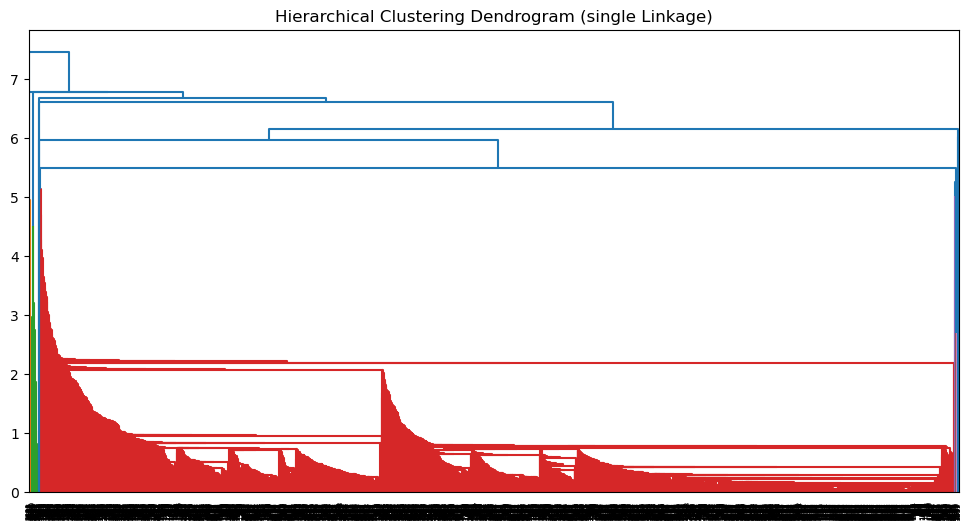

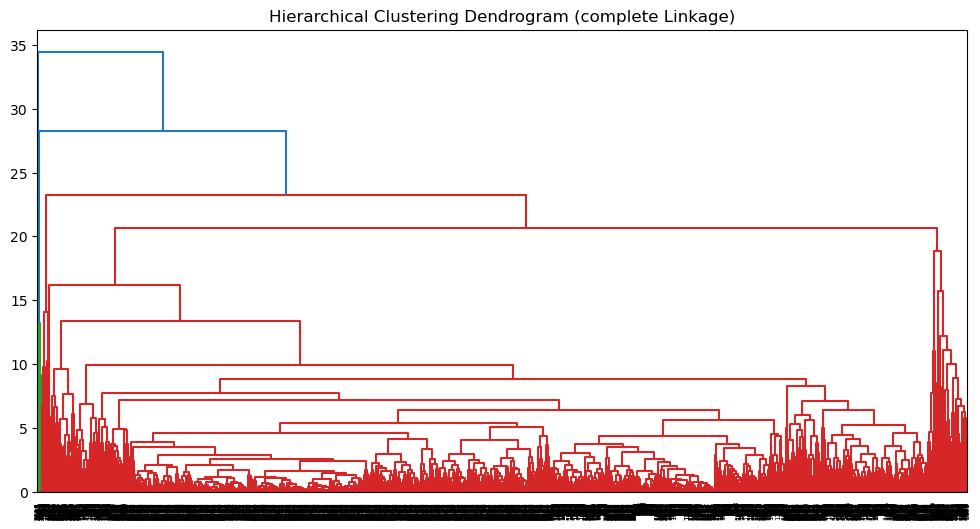

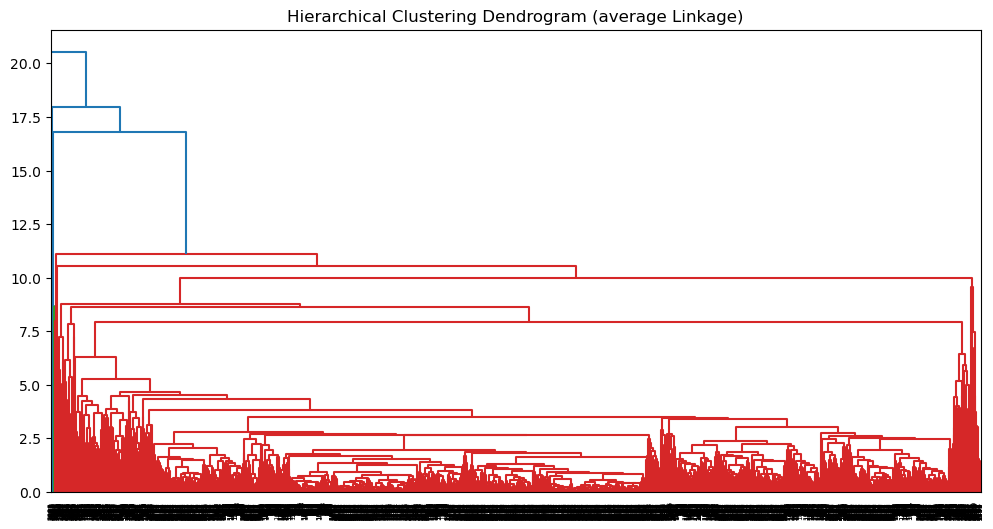

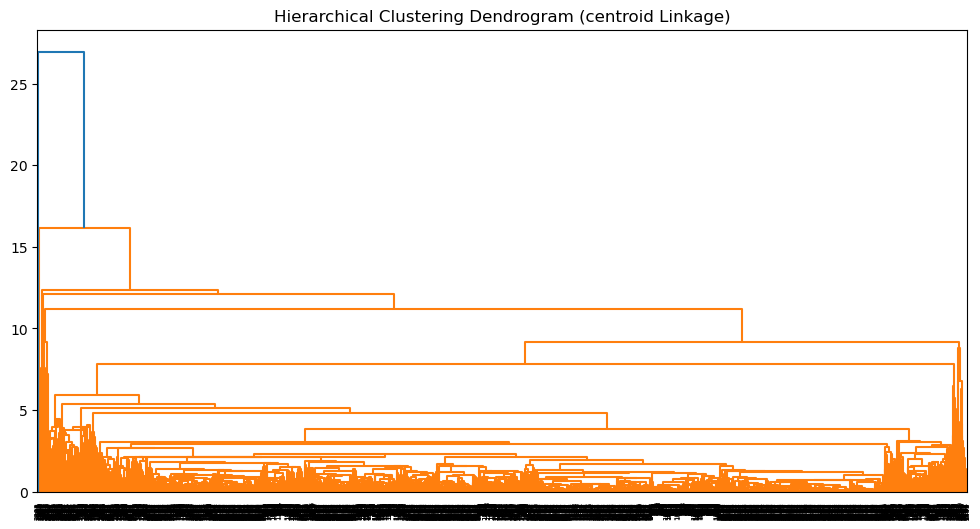

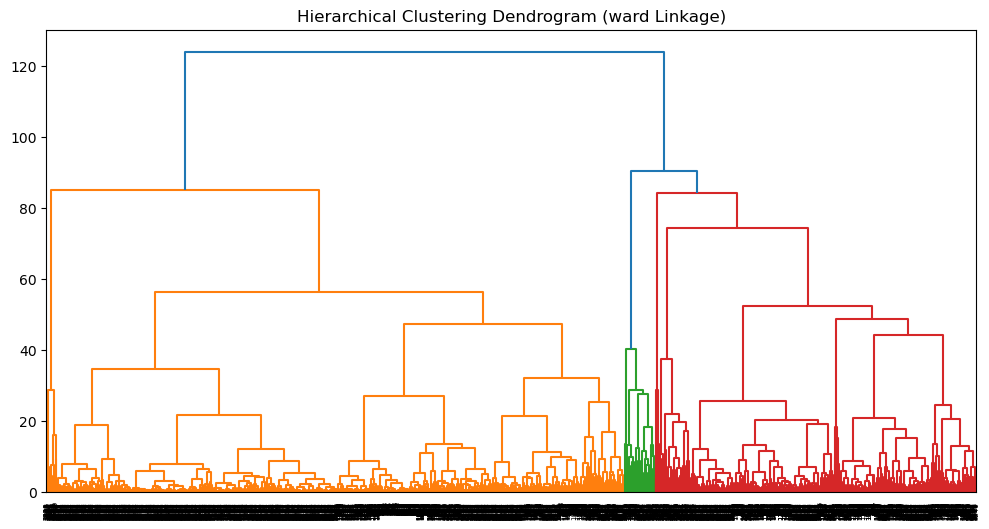

In [10]:
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']
data_labels = df['ID#'].tolist()

for method in linkage_methods:
    linkage_matrix = sch.linkage(X_scaled, method=method, metric='euclidean')
    plt.figure(figsize=(12, 6))
    plt.title(f'Hierarchical Clustering Dendrogram ({method} Linkage)')
    dendrogram(linkage_matrix, labels=data_labels)
    plt.show()


# K-means Clustering

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

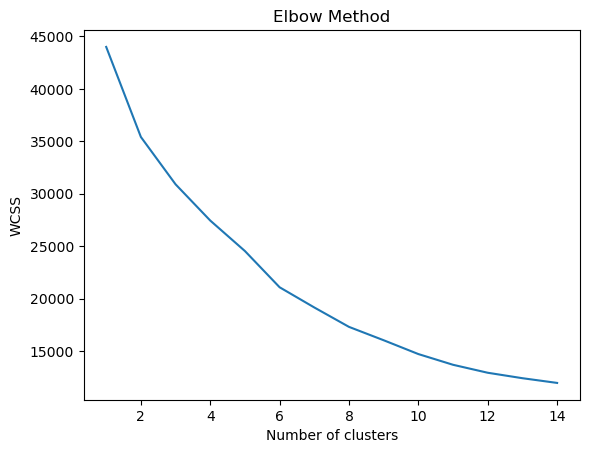

In [11]:
#Elbow chart
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [12]:
# K-Means Clustering
kmeans_cluster = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans_cluster.fit_predict(X_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df['KMeans'] = kmeans_labels

In [14]:
kmeans_cluster.labels_

array([0, 0, 0, ..., 7, 6, 6])

In [15]:
kmeans_cluster.cluster_centers_

array([[-0.14232046, -0.14410972, -0.41085965, -0.09824189, -0.05752883,
        -0.45301311, -0.33026753, -0.20382759, -0.22278692,  0.73265771,
        -0.7669193 ],
       [ 1.24396101,  0.53016896,  0.25203552, -0.09824189, -0.06276658,
         0.82768261,  1.90240145,  4.04732387,  4.29804926,  0.30654091,
         0.93352447],
       [ 0.64278782, -0.10624666,  1.5556267 , -0.09824189, -0.05027262,
         1.36988578,  0.87037337, -0.05079643, -0.0509151 ,  0.40607186,
         0.53871846],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.41182718,  7.12219641, -0.0297777 , -0.09824189, -0.06276658,
         0.04544156,  0.05881382,  0.30911931,  0.34093757, -0.07634936,
         0.306

In [16]:
# Calculate the mean 
mean_stats = df.groupby('KMeans')[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']].mean().reset_index()
mean_stats

,KMeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,59285.212462,32.602656,1.495403,1.000000,1.001021,6222.193054,8.430031,175.175689,0.530133,5629.152196,0.000000
1,1,198946.650407,554.235772,2.406504,1.000000,1.000000,37131.682927,29.869919,6126.447154,17.674797,4751.528455,0.821138
2,2,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,115098.296296,5653.611111,2.018519,1.000000,1.000000,18242.166667,12.166667,892.833333,2.666667,3960.907407,0.518519
6,6,34625.162771,32.734199,1.253680,1.000000,1.000000,4432.968831,6.647619,150.138528,0.450216,2086.555844,0.000000
7,7,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000


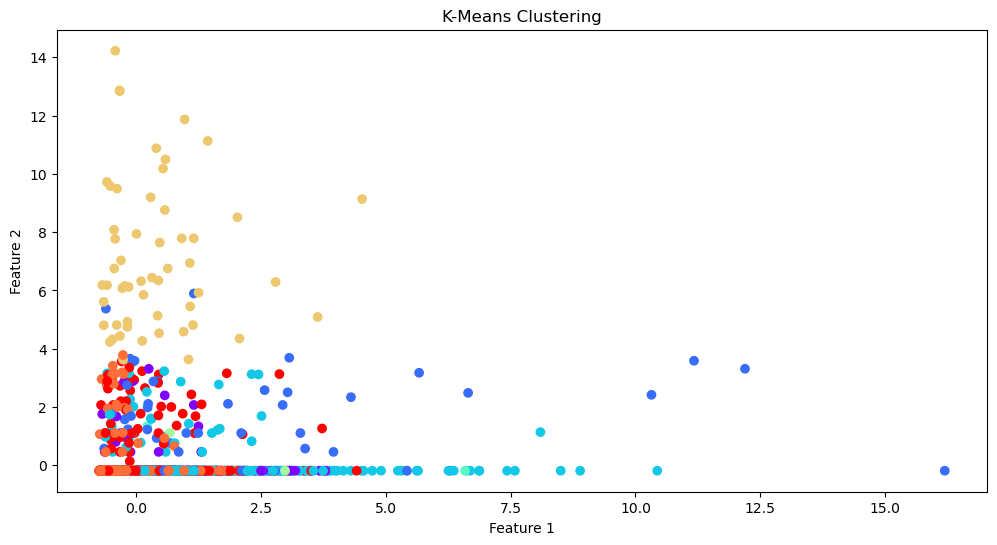

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN

In [18]:
dbscan_cluster = DBSCAN(eps=1.2, min_samples=12)
dbscan_cluster.fit(X_scaled)
dbscan_labels = dbscan_cluster.fit_predict(X_scaled)

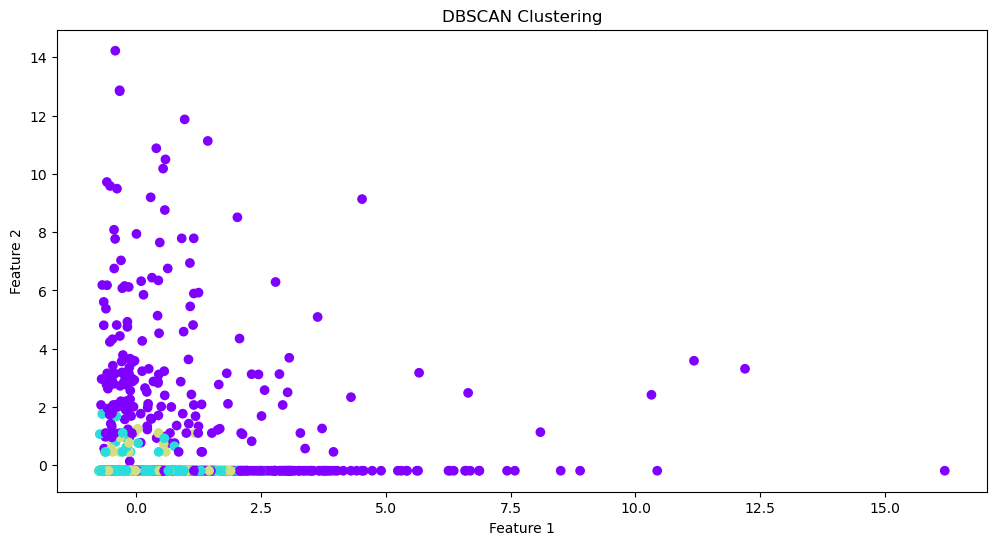

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
print("DBSCAN Clustering Labels:")
print(dbscan_labels)

DBSCAN Clustering Labels:
[0 0 0 ... 1 0 0]


In [21]:
df['DBSCAN_Cluster'] = dbscan_labels

# Inference 

In [22]:
kmeans_cluster_centers = kmeans.cluster_centers_
data = df.drop('ID#', axis=1)
cluster_statistics = data.groupby('KMeans').agg(['mean']).reset_index()
dbscan_cluster_statistics = data.groupby('DBSCAN_Cluster').agg(['mean']).reset_index()

print("K-Means Cluster Centers:")
print(kmeans_cluster_centers)
print("\nK-Means Cluster Statistics:")
print(cluster_statistics)
print("\nDBSCAN Cluster Statistics:")
print(dbscan_cluster_statistics)

K-Means Cluster Centers:
[[ 0.78965705 -0.0199909   2.01204813 -0.09824189 -0.03979563  2.53500511
   1.2378811   0.11406694  0.15333769  0.71290659  1.13676536]
 [ 0.39083901  0.12600968 -0.22924503 -0.09824189 -0.06276658  0.0660795
   0.89361401  2.2295618   2.41113292  0.04146962  0.68519233]
 [-0.26165563 -0.14570785 -0.69286499 -0.09824189 -0.05591829 -0.58999571
  -0.63391046 -0.22576581 -0.24091038  0.77564147 -0.7669193 ]
 [-0.11244316 -0.14559246  0.09529286 -0.09824189 -0.06276658 -0.15006201
   0.63624278 -0.24314079 -0.26998198 -0.66806252 -0.76185613]
 [ 0.63971926 -0.08443292  1.0220844  -0.09824189 15.64629931  3.17969131
   1.71461374  0.03329269  0.05969539  0.23987261  0.33752735]
 [ 0.44390061  7.21892086 -0.04322862 -0.09824189 -0.06276658  0.05039231
   0.08664955  0.36298367  0.40395173 -0.09809759  0.28803563]
 [-0.21208096 -0.10011784 -0.76957841 13.44897558 -0.06276658  0.13523387
   0.76348339  0.1661466   0.48155865 -0.02083711  0.06141568]
 [ 0.87732768  0.